In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

from umap import UMAP
import umap
from tqdm import tqdm
import plotly.graph_objects as go

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [28]:
def filter_df(data, criteria) -> pd.DataFrame:
    res = data.loc[(data[list(criteria)] == pd.Series(criteria)).all(axis=1)]
    rem = [i for i in criteria.keys()]
    res.drop(columns=rem, inplace=True)
    return res

In [29]:
dt = pd.read_csv('./Data/clean_vehicles.csv')

### Removing the following -
url

region_url

VIN

image_url

description

posting_date

In [31]:
dt.drop(columns=[
    'url',
    'region_url',
    'VIN',
    'image_url',
    'description',
    'posting_date'
], inplace=True)

In [33]:
test_crit = {'manufacturer':'honda'}
res = filter_df(dt, criteria=test_crit)

In [34]:
numerical = res.select_dtypes(exclude='object')
numerical

,id,price,year,odometer,lat,long
32,7313406529,14000,2012.0,95000.0,32.628739,-85.461820
47,7311960895,26590,2020.0,9954.0,32.590000,-85.480000
48,7311818339,18590,2018.0,28942.0,32.590000,-85.480000
50,7311818157,21590,2018.0,7885.0,32.590000,-85.480000
143,7316869910,12950,2011.0,87994.0,33.384664,-86.737847
...,...,...,...,...,...,...
383422,7303007549,17990,2014.0,43709.0,33.779214,-84.411811
383424,7303006177,16590,2016.0,84315.0,33.786500,-84.445400
383431,7302979417,11950,2013.0,91785.0,40.746503,-111.940084
383458,7302115020,4277,2005.0,236787.0,45.762900,-108.539000


In [35]:
categorical = res.select_dtypes(include='object')
categorical

,region,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
32,auburn,odyssey,excellent,6 cylinders,gas,clean,automatic,fwd,full-size,mini-van,silver,al
47,auburn,civic si coupe 2d,good,8 cylinders,gas,clean,other,fwd,full-size,coupe,silver,al
48,auburn,civic lx sedan 4d,good,4 cylinders,gas,clean,other,fwd,full-size,sedan,white,al
50,auburn,civic ex sedan 4d,good,4 cylinders,gas,clean,other,fwd,full-size,sedan,white,al
143,birmingham,crv ex,excellent,4 cylinders,gas,clean,automatic,fwd,full-size,SUV,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...
383422,wyoming,cr-v ex-l sport utility 4d,good,6 cylinders,other,clean,other,fwd,sub-compact,other,white,wy
383424,wyoming,cr-v se sport utility 4d,good,6 cylinders,other,clean,automatic,fwd,sub-compact,SUV,blue,wy
383431,wyoming,accord touring,good,6 cylinders,gas,clean,automatic,fwd,sub-compact,sedan,black,wy
383458,wyoming,civic,good,8 cylinders,gas,clean,automatic,fwd,sub-compact,coupe,white,wy


### finding k

In [36]:
res2 = res.copy()

cat_col = []
for i in categorical.columns:
    cat_col.append(res2.columns.get_loc(i))

cat_col

[1, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]

In [37]:
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 6)):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2, n_jobs=8)
        clusters = kproto.fit_predict(res2, categorical=cat_col)
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")

fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

  0%|          | 0/4 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Init: initializing centroids
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 4, iteration: 1/100, moves: 275, ncost: 8.920922350424498e+16
Run: 3, iteration: 1/100, moves: 657, ncost: 8.944028932757835e+16
Run: 7, iteration: 1/100, moves: 555, ncost: 8.939219703284744e+16
Run: 1, iteration: 1/100, 

 25%|██▌       | 1/4 [00:23<01:10, 23.62s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 65, ncost: 3.990248664866697e+16
Run: 7, iteration: 1/100, moves: 2058, ncost: 4.265088435386617e+16
Run: 1, iteration: 1/100, moves: 4991, ncost: 6.093015754155064e+16
Run: 3, iteration: 1/100,

 50%|█████     | 2/4 [01:14<01:18, 39.49s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Init: initializing centroids
Starting iterations...
Init: initializing centroids
Starting iterations...
Init: initializing clusters
Starting iterations...
Init: initializing clusters
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 4, iteration: 1/100, moves: 2787, ncost: 2.95170244

 75%|███████▌  | 3/4 [02:43<01:02, 62.07s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Init: initializing centroids
Init: initializing centroids
Starting iterations...
Starting iterations...
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 2, iteration: 1/100, moves: 4234, ncost: 2.7279661038030812e+16
Run: 1, iteration: 1/100, moves: 1961, ncost: 2.352563774501484e+16
Run: 3, iteration: 1/100, moves: 

100%|██████████| 4/4 [04:00<00:00, 60.25s/it]


## UMAP

In [38]:
num = numerical.copy()
cat = categorical.copy()

In [39]:
# for numerical data
for c in num.columns:
    p = PowerTransformer()
    num.loc[:,c] = p.fit_transform(np.array(num[c]).reshape(-1,1))

# for categorical data
cat = pd.get_dummies(cat)

cat_wt = len(res.select_dtypes(include='object').columns)/res.shape[1]

fit_num = UMAP(metric='cosine').fit(num)
fit_cat = UMAP(metric='dice').fit(cat)

# Calculate weighted intersection of graphs
intersection = fit_num.graph_ * fit_cat.graph_ * cat_wt

# Embed using the intersected data
embedding = UMAP(n_components=fit_num.n_components, metric=fit_num.metric).fit_transform(intersection)

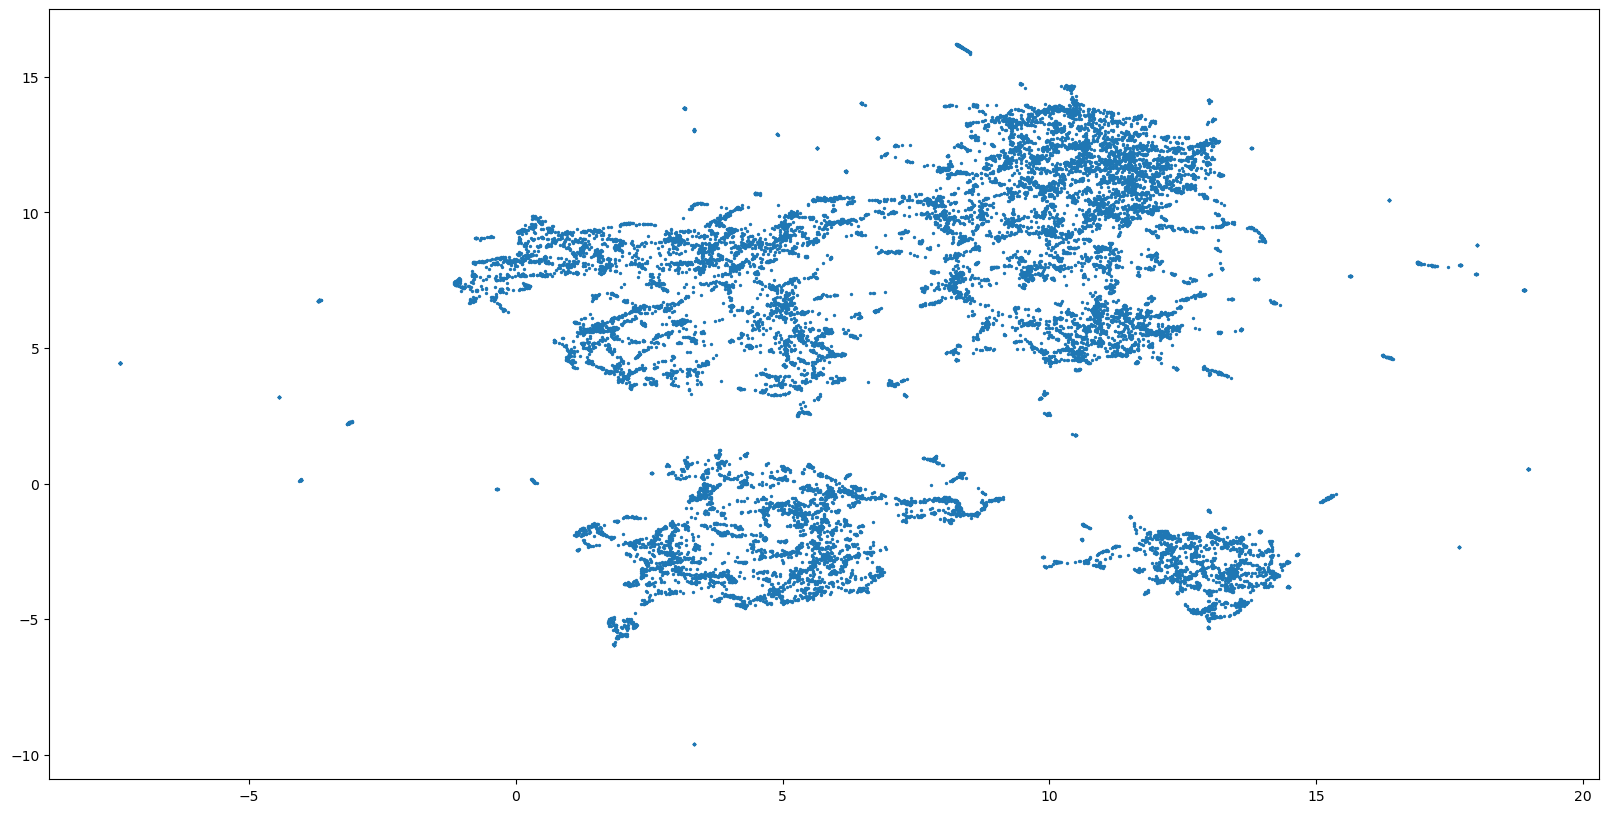

In [40]:
plt.figure(figsize=(20, 10))
plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

## KPrototype

In [41]:
res1 = res.copy()
for c in numerical.columns:
    p = PowerTransformer()
    res1.loc[:,c] = p.fit_transform(np.array(res1[c]).reshape(-1,1))

In [42]:
res1.head()

,id,region,price,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
32,0.340104,auburn,0.559462,0.110469,odyssey,excellent,6 cylinders,gas,0.006238,clean,automatic,fwd,full-size,mini-van,silver,al,-1.058328,0.432794
47,-0.002428,auburn,1.488251,1.726097,civic si coupe 2d,good,8 cylinders,gas,-1.841537,clean,other,fwd,full-size,coupe,silver,al,-1.065012,0.431849
48,-0.036152,auburn,0.938100,1.294298,civic lx sedan 4d,good,4 cylinders,gas,-1.154944,clean,other,fwd,full-size,sedan,white,al,-1.065012,0.431849
50,-0.036195,auburn,1.157629,1.294298,civic ex sedan 4d,good,4 cylinders,gas,-1.958727,clean,other,fwd,full-size,sedan,white,al,-1.065012,0.431849
143,1.164797,birmingham,0.463339,-0.071616,crv ex,excellent,4 cylinders,gas,-0.084921,clean,automatic,fwd,full-size,SUV,silver,al,-0.927345,0.366515


In [43]:
kproto = KPrototypes(n_clusters=3, init='Cao', n_jobs=8)
clusters = kproto.fit_predict(res1, categorical = cat_col)

In [44]:
pd.Series(clusters).value_counts()

0    9717
1    6062
2    4493
Name: count, dtype: int64

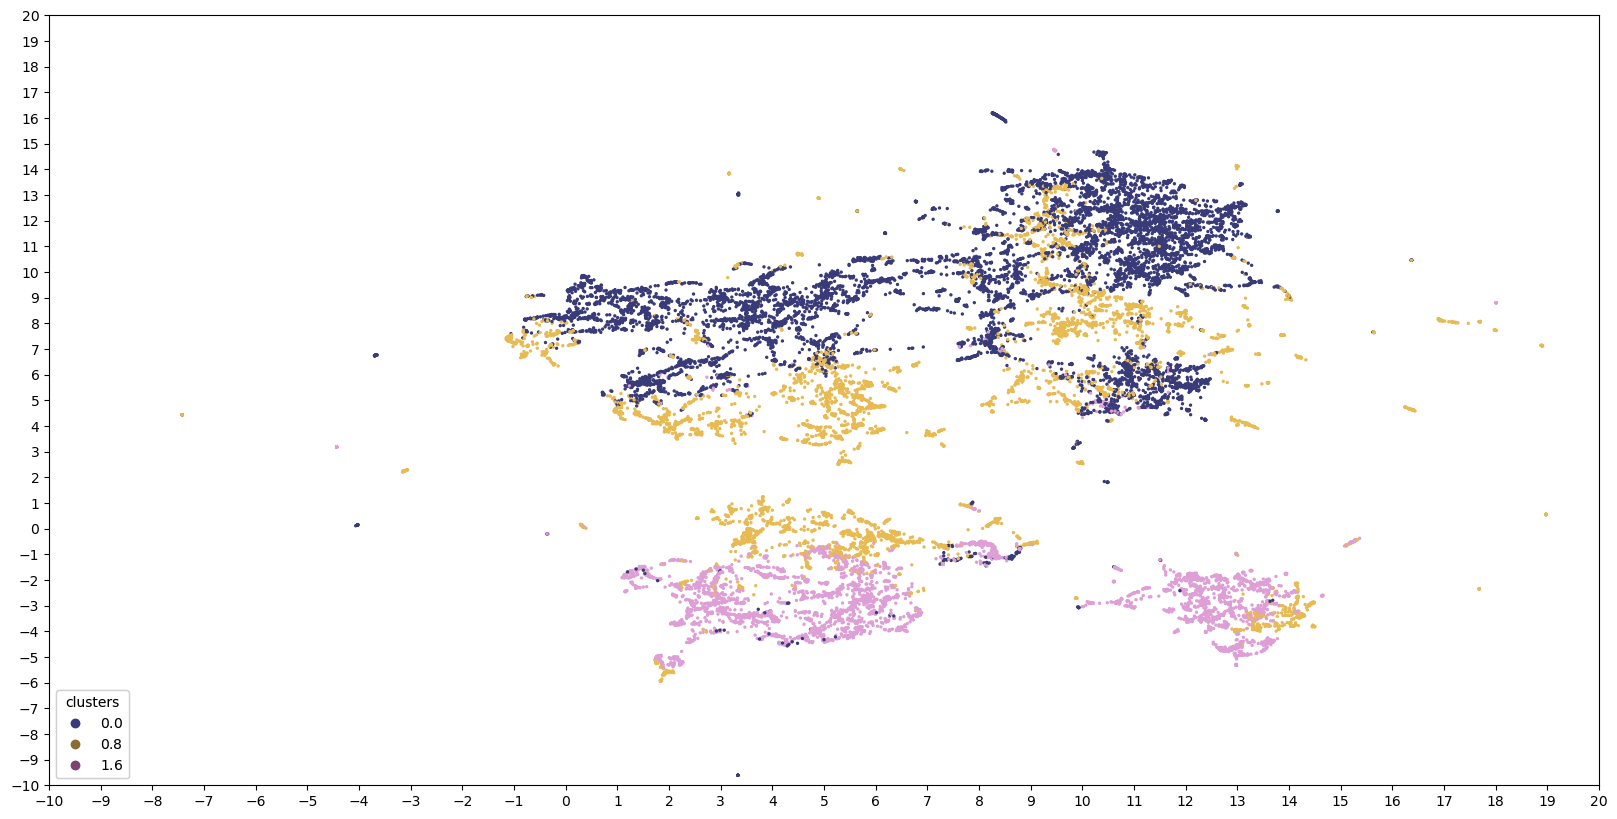

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:,0], embedding[:,1], s = 2, c=clusters, cmap='tab20b', alpha=1)
legend1 = ax.legend(*scatter.legend_elements(num=3), loc='lower left', title='clusters')

ax.set_xlim(-10, 20)
ax.set_ylim(-10, 20)
ax.set_xticks(range(-10, 21, 1))
ax.set_yticks(range(-10, 21, 1))

ax.add_artist(legend1)